In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import networkx as nx

color = sns.color_palette()

# 1. Setting Up

In [3]:
# Import necessary libraries

#misc
import gc
import time
import warnings
import json
import os
import ast

import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

Load the business dataset

In [2]:
business = pd.read_csv('/home/han2114/final_project_tools_analytics/yelp_academic_dataset_business_full.csv')
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 61 columns):
hours.Friday                             141796 non-null object
attributes.RestaurantsAttire             48182 non-null object
attributes.BikeParking                   84891 non-null object
state                                    188593 non-null object
categories                               188052 non-null object
attributes.BusinessParking               103424 non-null object
attributes.Alcohol                       47892 non-null object
attributes.GoodForDancing                9162 non-null object
attributes.BYOB                          911 non-null object
attributes.DietaryRestrictions           138 non-null object
attributes.RestaurantsReservations       51363 non-null object
attributes.GoodForKids                   64931 non-null object
attributes.Smoking                       8113 non-null object
hours.Sunday                             93387 non-null object
attribute

In [4]:
cat_all = ','.join(business['categories'].dropna()).replace(" ", "")
cat_all = pd.DataFrame(cat_all.split(','), columns=['category'])
cat_all_count = cat_all.category.value_counts().sort_values(ascending = False)
print("There are ",len(cat_all_count)," different types/categories of Businesses in Yelp!")

There are  1305  different types/categories of Businesses in Yelp!


In [5]:
cat_all_count

Restaurants                 57173
Shopping                    30231
Food                        27118
Beauty&Spas                 18967
HomeServices                18634
Health&Medical              16157
LocalServices               12906
Automotive                  12656
Nightlife                   12438
Bars                        10853
EventPlanning&Services       9774
ActiveLife                   9119
Fashion                      7406
Coffee&Tea                   6936
Sandwiches                   6912
HairSalons                   6825
FastFood                     6812
American(Traditional)        6659
Pizza                        6603
Home&Garden                  6020
AutoRepair                   5877
Hotels&Travel                5808
Arts&Entertainment           5794
ProfessionalServices         5620
Doctors                      5450
RealEstate                   5295
Burgers                      5126
Breakfast&Brunch             5023
NailSalons                   4839
Fitness&Instru

In [6]:
tfile = open('cat_all_count.txt', 'a')
tfile.write(cat_all_count.to_string())
tfile.close()

In [7]:
food_masks = ['Restaurants', 'Food','Sandwiches', 'FastFood', 'Breakfast&Brunch', 'SpecialtyFood', 'Burgers',
                    'American(Traditional)', 'American(New)','Pizza', 'Italian','African','Falafel','Turkish',
                    'Desserts', 'Bakeries', 'Salad','ChickenWings', 'Mexican','Seafood','Chinese','Malaysian',
                    'IceCream&FrozenYogurt', 'Delis', 'Japanese', 'Bars', 'Canadian(New)', 'AsianFusion',
                    'Mediterranean', 'SushiBars','JuiceBars&Smoothies','Steakhouses','Coffee&Tea','Pretzels','PanAsian',
                    'Barbeque','Beer','Wine&Spirits','SportsBars', 'Pubs','British','Poke','Delicatessen',
                     'Lounges', 'WineBars', 'CocktailBars', 'Diners','Patisserie/CakeShop','Kosher','Afghan',
                     'Vegetarian', 'EthnicFood', 'MiddleEastern','Persian/Iranian','FoodCourt','IrishPub',
                     'Gluten-Free','ComfortFood','Indian','Soup','Vegan', 'Thai','FoodTrucks','Szechuan',
                     'French','Greek','Buffets','Vietnamese','HotDogs','DiveBars','Tex-Mex','HotPot','Polish','Moroccan',
                     'ImportedFood','Gastropubs','Bagels','BeerBar','Halal','Korean','Donuts','Tapas/SmallPlates',
                     'Breweries','Southern','LatinAmerican','Do-It-YourselfFood','InternetCafes','Cantonese',
                     'BubbleTea','TapasBars','Caribbean','Lebanese','CoffeeRoasteries','Gelato','Brazilian',
                     'Pakistani','FoodStands','Hawaiian','Dim Sum','Tacos','SoulFood','Creperies','Ethiopian',
                     'Fish&Chips','Cajun/Creole','Irish','ShavedIce','InternetCafes','Bistros','Peruvian','Waffles',
                     'ModernEuropean','Taiwanese','Filipino','Cheesesteaks','German','Brasseries','Cuban',
                     'Wineries','Ramen','Spanish','Poutineries','TeaRooms','Noodles','Cupcakes','Portuguese']

In [8]:
bus_cats = business['categories']
index_food_masks = list()
NaN_list = list()
for index, bus_cat in enumerate(bus_cats):
    if pd.isnull(bus_cat) == True:
        NaN_list.append(index)
    else:
        if bool(set(bus_cat.replace(" ","").split(',')) & set(food_masks)):
            index_food_masks.append(index)

In [9]:
restaurants = business.iloc[index_food_masks]

In [10]:
cat_all_res = ','.join(restaurants['categories']).replace(" ", "")
cat_all_res = pd.DataFrame(cat_all_res.split(','), columns=['category'])
cat_all_res_count = cat_all_res.category.value_counts().sort_values(ascending = False)
print("There are ",len(cat_all_res_count)," different types/categories of Restaurants in Yelp!")

There are  835  different types/categories of Restaurants in Yelp!


In [11]:
USA_mask = ['AZ','NV','OH','NC','PA','WI','IL','SC','IN','OR','NY','MO','FL','AL','VA','CA']
CAN_mask = ['ON','QC','AB','BC']
UK_mask = ['NYK','XGM','NLK','XMS','CMA','WHT']
GER_mask = ['NI','BY','HE','ST','RP','NW']
location_mask = USA_mask + CAN_mask + UK_mask + GER_mask

In [12]:
index_location_mask = list()
state = restaurants['state']
for index, state in enumerate(state):
    if state in location_mask:
        index_location_mask.append(index)

In [13]:
restaurants = restaurants.iloc[index_location_mask]

In [14]:
def label_country (row):
    if row['state'] in  USA_mask:
          return 'USA'
    if row['state'] in  CAN_mask:
          return 'Canada'
    if row['state'] in  UK_mask:
          return 'UK'
    if row['state'] in  GER_mask:
          return 'Germany'

restaurants['country'] = restaurants.apply(lambda row: label_country(row),axis=1)

# 2. Exploratory Data Analysis

### 2A. Rating Distributions

In [15]:
# Get the distribution of the ratings
rating_dist = restaurants['stars'].value_counts().sort_index()
rating_dist

1.0      540
1.5     1540
2.0     4065
2.5     7400
3.0    12984
3.5    17410
4.0    18145
4.5    10069
5.0     3199
Name: stars, dtype: int64

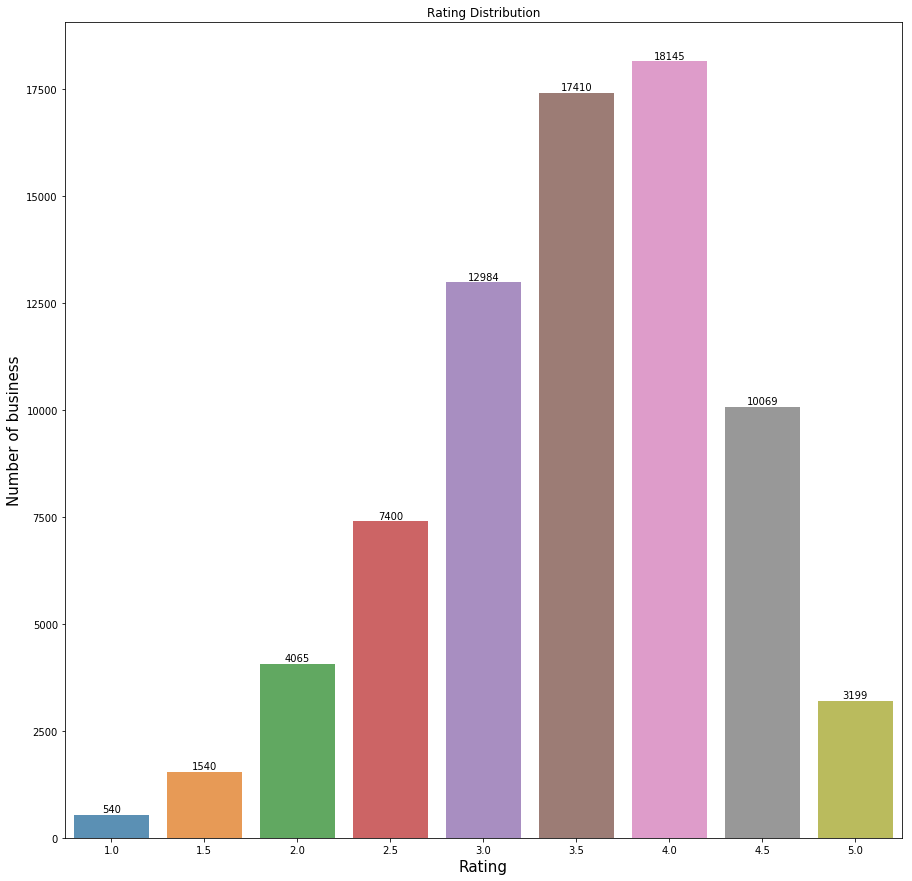

In [16]:
plt.figure(figsize=(15,15))
ax = sns.barplot(rating_dist.index, rating_dist.values, alpha=0.8)
plt.title("Rating Distribution")
plt.ylabel('Number of business', fontsize=15)
plt.xlabel('Rating', fontsize=15)

rects = ax.patches
labels = rating_dist.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

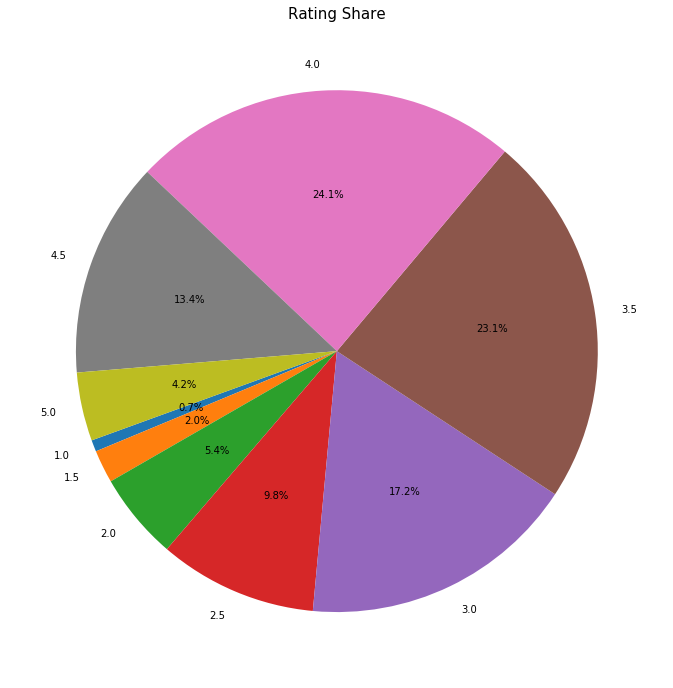

In [17]:
plt.figure(figsize=(12,12))
labels = (np.array(rating_dist.index))
sizes = (np.array((rating_dist / rating_dist.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct= '%1.1f%%', startangle = 200)
plt.title("Rating Share", fontsize=15)
plt.show()

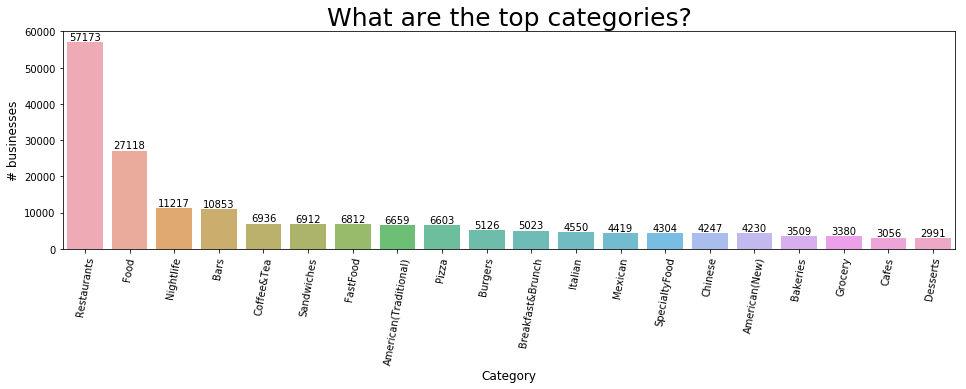

In [18]:
x = cat_all_res_count.iloc[0:20]

plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

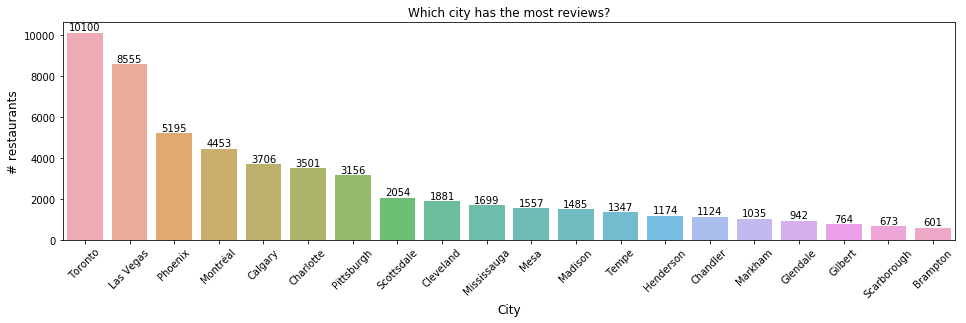

In [19]:
# Location distribution

city_count = restaurants['city'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,4))
ax = sns.barplot(city_count[0:20].index, city_count[0:20].values, alpha=0.8)
plt.title("Which city has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('City', fontsize=12)

rects = ax.patches
labels = city_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

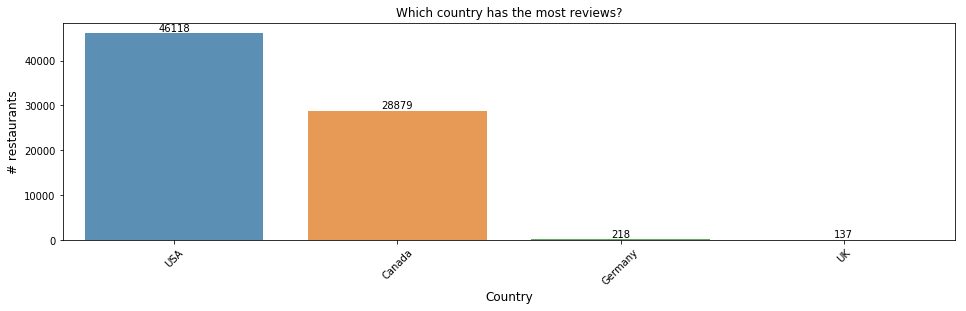

In [20]:
# Country distribution

country_count = restaurants['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(16,4))
ax = sns.barplot(country_count.index, country_count.values, alpha=0.8)
plt.title("Which country has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# restaurants', fontsize=12)
plt.xlabel('Country', fontsize=12)

rects = ax.patches
labels = country_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [21]:
# Top restaurants by number of reviews

top_res = restaurants[restaurants['stars'] == 5.0]
top_res.loc[top_res['review_count'].idxmax()]['review_count']

1746

# 3. Feature Selection

## 3.0 We hypothesize that the following features are important

Review and User-related features

1. Review Count
2. Star Rating
3. Number of users who wrote reviews
4. Maximum number of stars
5. Minimum number of stars
6. Number of reviews voted as 'cool'
7. Number of reviews voted as 'funny'
8. Number of reviews voted as 'useful'
9. Time since first/last reviews
10. Time between first and last reviews
11. Max number of review in a single day


Business Attributes Feature:
    
1. Hours
2. Categories
3. Business Parking
4. Restaurant Reservations
5. Good for Kids
6. Smoking
7. Good for Meal
8. Noise Level
9. Music
10. Ages Allowed
11. Restaurants Good for Groups
12. WiFi
13. Business Accepts Credit Cards
14. Ambience
15. Restaurant Price Range
16. Happy Hour
17. Outdoors Seating

In [34]:
col

Index(['hours.Friday', 'attributes.RestaurantsAttire',
       'attributes.BikeParking', 'state', 'categories',
       'attributes.BusinessParking', 'attributes.Alcohol',
       'attributes.GoodForDancing', 'attributes.BYOB',
       'attributes.DietaryRestrictions', 'attributes.RestaurantsReservations',
       'attributes.GoodForKids', 'attributes.Smoking', 'hours.Sunday',
       'attributes.BYOBCorkage', 'latitude',
       'attributes.BusinessAcceptsBitcoin', 'attributes.GoodForMeal',
       'attributes.BestNights', 'attributes.NoiseLevel', 'attributes.Corkage',
       'attributes.Music', 'hours.Wednesday', 'attributes.Open24Hours',
       'longitude', 'neighborhood', 'attributes.HairSpecializesIn',
       'hours.Thursday', 'attributes.AgesAllowed',
       'attributes.ByAppointmentOnly', 'business_id',
       'attributes.RestaurantsDelivery', 'attributes.RestaurantsGoodForGroups',
       'postal_code', 'attributes.RestaurantsTableService', 'attributes.WiFi',
       'hours', 'attributes

## 3.1 Merge Restaurants with Users and Reviews

In [35]:
#importing the yelp reviews dataset
datastr=open('yelp_academic_dataset_review.json','r')
datajson=datastr.readlines()
check=[json.loads(x) for x in datajson]
ind=range(0,len(check))
reviews=pd.DataFrame(check,index=ind,columns=check[0].keys())

In [43]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [44]:
restaurant_reviews = reviews[reviews["business_id"].isin(restaurants["business_id"])]

In [100]:
# User counts, max and min ratings
user_rating_count = restaurant_reviews[['user_id','business_id']].groupby(['business_id']).count()
user_rating_count = user_rating_count.rename(columns = {'business_id':'user_rating_count'})
max_rating_restaurant = restaurant_reviews[['business_id','stars']].groupby(['business_id']).max()
max_rating_restaurant = max_rating_restaurant.rename(columns = {'stars':'max_rating_rest'})
min_rating_restaurant = restaurant_reviews[['business_id','stars']].groupby(['business_id']).min()
min_rating_restaurant = min_rating_restaurant.rename(columns = {'stars':'min_rating_rest'})

In [74]:
# Useful, funny, cool
useful_mean = restaurant_reviews[['business_id','useful']].groupby(['business_id']).mean()
useful_mean = useful_mean.rename(columns = {'business_id':'useful_mean'})
funny_mean = restaurant_reviews[['business_id','funny']].groupby(['business_id']).mean()
funny_mean = funny_mean.rename(columns = {'business_id':'funny_mean'})
cool_mean = restaurant_reviews[['business_id','cool']].groupby(['business_id']).mean()
cool_mean = cool_mean.rename(columns = {'business_id':'cool_mean'})

In [101]:
restaurants = restaurants.merge(user_rating_count, how = 'left', on = 'business_id')

In [105]:
user_rating_count = restaurant_reviews[['user_id','business_id']]

In [104]:
user_rating_count = 

## 3.2 Ambience

In [108]:
# Understand the ambience
restaurants['attributes.Ambience'].unique()

array([nan,
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': True, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': True}",
       "{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': True, 'upscale': False, 'casual': False}",
       "{'roma

In [110]:
def ambience_extract(row):
    ambience_list = list()
    import ast
    if pd.isnull(row['attributes.Ambience']):
        return None
    else:
        for key, value in ast.literal_eval(row['attributes.Ambience']).items():
            if value == True:
                ambience_list.append(key)
        return ",".join(ambience_list)

In [111]:
restaurants['Ambience'] = restaurants.apply(lambda row: ambience_extract(row),axis=1)

In [112]:
ambience_list = restaurants['Ambience'].tolist()
ambience_list = [x for x in ambience_list if x is not None and x != '']

In [113]:
cat_all_am = ','.join(ambience_list)

In [114]:
cat_all_am = pd.DataFrame(cat_all_am.split(','), columns=['Ambience'])
cat_all_am_count = cat_all_am.Ambience.value_counts().sort_values(ascending = False)
cat_all_am_count

casual      22191
trendy       2428
classy       1061
divey        1057
hipster      1043
intimate      672
romantic      600
upscale       494
touristy      228
Name: Ambience, dtype: int64

We create dummy variables for 'casual', 'trendy' and 'Others'

In [120]:
def ambience_casual(row):
    if row['Ambience'] is not None and row['Ambience'] != '':
        if 'casual' in row['Ambience'].split(','):
            return 1
        else:
            return 0
    else:
        return 0
restaurants['ambience_casual'] = restaurants.apply(lambda row: ambience_casual(row),axis=1)

In [123]:
def ambience_trendy(row):
    if row['Ambience'] is not None and row['Ambience'] != '':
        if 'trendy' in row['Ambience'].split(','):
            return 1
        else:
            return 0
    else:
        return 0
restaurants['ambience_trendy'] = restaurants.apply(lambda row: ambience_trendy(row),axis=1)

In [125]:
ambience_others_list = ['romantic', 'intimate', 'classy', 'hipster', 'touristy', 'upscale', 'divey']
def ambience_others(row):
    if row['Ambience'] is not None and row['Ambience'] != '':
        if (set(ambience_others_list) & set(row['Ambience'].split(','))):
            return 1
        else:
            return 0
    else:
        return 0
restaurants['ambience_others'] = restaurants.apply(lambda row: ambience_others(row),axis=1)

## 3.3 Food categories

In [91]:
cat_all_res_count

Restaurants                    57173
Food                           27118
Nightlife                      11217
Bars                           10853
Coffee&Tea                      6936
Sandwiches                      6912
FastFood                        6812
American(Traditional)           6659
Pizza                           6603
Burgers                         5126
Breakfast&Brunch                5023
Italian                         4550
Mexican                         4419
SpecialtyFood                   4304
Chinese                         4247
American(New)                   4230
Bakeries                        3509
Grocery                         3380
Cafes                           3056
Desserts                        2991
EventPlanning&Services          2929
Shopping                        2735
IceCream&FrozenYogurt           2613
Japanese                        2566
ChickenWings                    2538
Seafood                         2369
Salad                           2350
S

## 3.4 Create Dummy Variables for features

In [129]:
cols_dummy = ['attributes.RestaurantsAttire','attributes.Alcohol',
        'attributes.RestaurantsReservations','attributes.GoodForKids','attributes.Smoking',
        'attributes.NoiseLevel','attributes.Open24Hours',
        'attributes.AgesAllowed','attributes.ByAppointmentOnly','attributes.RestaurantsDelivery',
        'attributes.RestaurantsGoodForGroups','attributes.RestaurantsTableService','attributes.WiFi',
        'attributes.DogsAllowed','attributes.BusinessAcceptsCreditCards',
        'attributes.DriveThru','attributes.Caters','attributes.RestaurantsPriceRange2','attributes.RestaurantsTakeOut',
        'attributes.WheelchairAccessible','attributes.HasTV','attributes.HappyHour',
        'attributes.CoatCheck','attributes.OutdoorSeating','is_open','attributes.AcceptsInsurance']
        
        
special_col = ['attributes.GoodForMeal', 'attributes.BestNights','attributes.Music',
               'hours', 'attributes.BusinessParking','attributes.RestaurantsAttire']

In [130]:
res_full = pd.get_dummies(data=restaurants, columns = cols_dummy)

In [131]:
res_full.columns.values.tolist()

['hours.Friday',
 'attributes.BikeParking',
 'state',
 'categories',
 'attributes.BusinessParking',
 'attributes.GoodForDancing',
 'attributes.BYOB',
 'attributes.DietaryRestrictions',
 'hours.Sunday',
 'attributes.BYOBCorkage',
 'latitude',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.GoodForMeal',
 'attributes.BestNights',
 'attributes.Corkage',
 'attributes.Music',
 'hours.Wednesday',
 'longitude',
 'neighborhood',
 'attributes.HairSpecializesIn',
 'hours.Thursday',
 'business_id',
 'postal_code',
 'hours',
 'review_count',
 'name',
 'hours.Saturday',
 'attributes.Ambience',
 'attributes.RestaurantsCounterService',
 'address',
 'hours.Tuesday',
 'hours.Monday',
 'attributes',
 'stars',
 'city',
 'country',
 'Ambience',
 'user_id',
 'ambience_casual',
 'ambience_trendy',
 'ambience_others',
 'attributes.RestaurantsAttire_casual',
 'attributes.RestaurantsAttire_dressy',
 'attributes.RestaurantsAttire_formal',
 'attributes.Alcohol_beer_and_wine',
 'attributes.Alcohol_full_bar',
 

## 3.10 Final Feature Selection

In [132]:
cols_ml = ['review_count',
 'attributes.RestaurantsAttire_casual',
 'attributes.RestaurantsAttire_dressy',
 'attributes.RestaurantsAttire_formal',
 'attributes.Alcohol_full_bar',
 'attributes.RestaurantsReservations_True',
 'attributes.GoodForKids_True',
 'attributes.Smoking_outdoor',
 'attributes.Smoking_yes',
 'attributes.NoiseLevel_very_loud',
 'attributes.Open24Hours_True',
 'attributes.AgesAllowed_21plus',
 'attributes.ByAppointmentOnly_True',
 'attributes.RestaurantsGoodForGroups_True',
 'attributes.WiFi_free',
 'attributes.DogsAllowed_True',
 'attributes.BusinessAcceptsCreditCards_True',
 'attributes.DriveThru_True',
 'attributes.Caters_True',
 'attributes.RestaurantsPriceRange2_1.0',
 'attributes.RestaurantsPriceRange2_2.0',
 'attributes.RestaurantsPriceRange2_3.0',
 'attributes.RestaurantsPriceRange2_4.0',
 'attributes.RestaurantsTakeOut_True',
 'attributes.HappyHour_True',
 'attributes.CoatCheck_True',
 'attributes.OutdoorSeating_True',
 'ambience_casual',
 'ambience_trendy',
 'ambience_others']

# 4. Machine Learning Models

* Logistic Regression
* Random Forest
* Bootstrapping
* XGBoost

## 4.1 Simple Linear Regression

In [134]:
X = res_full[cols_ml]
y = restaurants['stars']

In [135]:
X.fillna(0,inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [136]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [139]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 11)

In [140]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [141]:
pred_y  = model.predict(test_X)
pred_y

array([3.63023415, 3.65579102, 3.44407855, ..., 3.12964321, 4.05438404,
       3.46762429])

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, pred_y))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, pred_y))

Coefficients: 
 [ 3.74415041e-04 -2.56492679e-01 -5.06435803e-02 -1.95949836e-01
 -1.41491063e-01  1.03214997e-01 -2.66644756e-02 -6.81815030e-02
  6.01992942e-02 -3.73939745e-01 -2.41812524e-01 -2.09430983e-01
  4.73690473e-01  9.27250637e-03  2.83668552e-02  2.95046105e-01
 -1.30378618e-01 -8.56012841e-01  1.47302805e-01  2.57706115e-01
  2.04280105e-01  2.13593457e-01  1.80953826e-01  5.18877455e-03
 -1.65356526e-02 -7.42674938e-02  4.87487428e-02  1.38169639e-01
  2.07599293e-01  2.44538044e-01]
Mean squared error: 0.61
Variance score: 0.11


## 4.1.1 Try to classify the successful restaurant using the result above

In [143]:
res_full['success'] = np.where(restaurants['stars'] >= 3.5,1,0)

In [145]:
X = res_full[cols_ml]
y = res_full['success']
X.fillna(0,inplace=True)
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 11)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [146]:
def get_classification(predictions, threshold):
    classes = np.zeros_like(predictions)
    for i in range(len(classes)):
        if predictions[i] > threshold:
            classes[i] = 1
    return classes
get_classification(pred_y, 4)

array([0., 0., 0., ..., 0., 1., 0.])

In [147]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(test_y, get_classification(pred_y,4)).ravel()
print(tn, fp, fn, tp)

7952 26 14245 383


In [148]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.36870742280810404


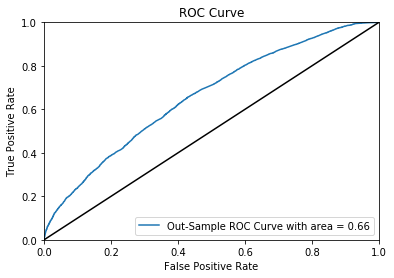

In [151]:
from sklearn.metrics import roc_curve, auc
testing_predictions = model.predict(test_X)
(fpr, tpr, thresholds) = roc_curve(test_y,testing_predictions)

area = auc(fpr,tpr)
plt.clf() #Clear the current figure
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 4.2 Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression().fit(train_X,train_y)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [153]:
trainset_acc = logr.score(train_X,train_y)
print('logr training set accuracy: {:.3f}'.format(trainset_acc))

logr training set accuracy: 0.673


In [154]:
pypos_logr =logr.predict_proba(test_X)[:,1]
pypos_logr

array([0.72790928, 0.72417045, 0.6077843 , ..., 0.43760852, 0.93382695,
       0.67928111])

### Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(train_X,np.ravel(train_y))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [189]:
model.score(test_X,test_y)

0.5932495797575865

Text(0.5, 0, 'Relative Importance')

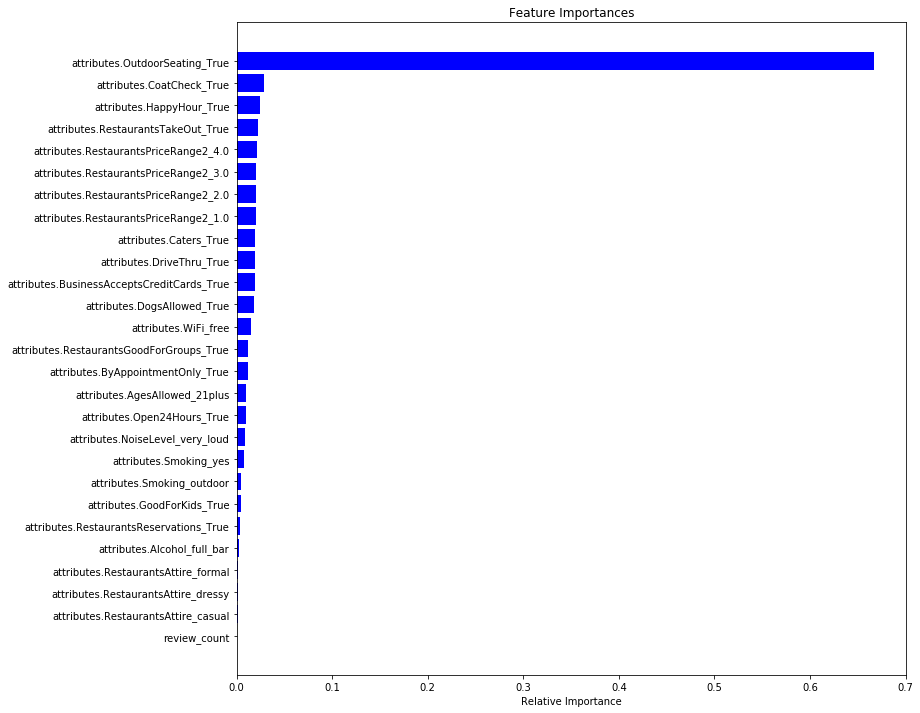

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),cols)
plt.xlabel('Relative Importance')

### Bootstrapping

In [191]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier()
model.fit(train_X,np.ravel(train_y))

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [192]:
model.score(test_X,test_y)

0.5935149960187561

### XGBoost

In [193]:
import xgboost as xgb

def runXGB(train_X, train_y, test_X, test_y=None, feature_names=None, seed_val=2017, num_rounds=400):
    param = {}
    param['objective'] = 'multi:softmax'
    param['num_class'] = 2
    param['eta'] = 0.12
    param['max_depth'] = 5
    param['silent'] = 1
    param['eval_metric'] = 'merror'
    param['min_child_weight'] = 1
    param['subsample'] = 0.5
    param['colsample_bytree'] = 0.7
    param['seed'] = seed_val
    num_rounds = num_rounds

    plst = list(param.items())
    xgtrain = xgb.DMatrix(train_X, label=train_y)

    if test_y is not None:
        xgtest = xgb.DMatrix(test_X, label=test_y)
        watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
        model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
    else:
        xgtest = xgb.DMatrix(test_X)
        model = xgb.train(plst, xgtrain, num_rounds)

    pred_test_y = model.predict(xgtest)
    return model,pred_test_y

In [194]:
test_y_pred = pd.DataFrame()
test_y_pred['id'] = test_y.index
test_y_pred['success'] = np.zeros_like(test_y.index)

In [195]:
sm = SMOTE(random_state=11)
X_res, y_res = sm.fit_sample(train_X, train_y)

X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)
test_X = pd.DataFrame(test_X)
test_y = pd.DataFrame(test_y)

X_res = X_res.values
y_res = y_res.values
test_X = test_X.values

In [196]:
kfold = 5
skf = StratifiedKFold(n_splits=kfold, random_state=11)

for i, (train_index, test_index) in enumerate(skf.split(X_res, y_res)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X_res[train_index], X_res[test_index]
    y_train, y_valid = y_res[train_index], y_res[test_index]
    
    model1,y = runXGB(X_train,y_train,X_valid,y_valid)
    test_pred = model1.predict(xgb.DMatrix(test_X))
    test_y_pred['success'] += test_pred/kfold

[Fold 1/5]
[0]	train-merror:0.405723	test-merror:0.413454
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 20 rounds.
[1]	train-merror:0.395656	test-merror:0.406865
[2]	train-merror:0.388722	test-merror:0.401741
[3]	train-merror:0.387847	test-merror:0.399382
[4]	train-merror:0.386383	test-merror:0.401415
[5]	train-merror:0.380221	test-merror:0.396128
[6]	train-merror:0.379326	test-merror:0.396047
[7]	train-merror:0.380364	test-merror:0.396047
[8]	train-merror:0.379672	test-merror:0.395477
[9]	train-merror:0.37833	test-merror:0.392712
[10]	train-merror:0.377883	test-merror:0.393607
[11]	train-merror:0.377659	test-merror:0.392061
[12]	train-merror:0.377069	test-merror:0.391329
[13]	train-merror:0.376296	test-merror:0.390841
[14]	train-merror:0.376276	test-merror:0.391492
[15]	train-merror:0.376581	test-merror:0.389865
[16]	train-merror:0.376276	test-merror:0.390109
[17]	train-merror:0.375991	test-merro

[59]	train-merror:0.371497	test-merror:0.386774
[60]	train-merror:0.37166	test-merror:0.386205
[61]	train-merror:0.371741	test-merror:0.386042
[62]	train-merror:0.371538	test-merror:0.385961
[63]	train-merror:0.371578	test-merror:0.386042
[64]	train-merror:0.371375	test-merror:0.385554
[65]	train-merror:0.371558	test-merror:0.385229
[66]	train-merror:0.370623	test-merror:0.385635
[67]	train-merror:0.370257	test-merror:0.385717
[68]	train-merror:0.370338	test-merror:0.386286
[69]	train-merror:0.369891	test-merror:0.386042
[70]	train-merror:0.369382	test-merror:0.386367
[71]	train-merror:0.368813	test-merror:0.386937
[72]	train-merror:0.367959	test-merror:0.386286
[73]	train-merror:0.367999	test-merror:0.386205
[74]	train-merror:0.368142	test-merror:0.386123
[75]	train-merror:0.367511	test-merror:0.385554
[76]	train-merror:0.366922	test-merror:0.385879
[77]	train-merror:0.36684	test-merror:0.385961
[78]	train-merror:0.366433	test-merror:0.385879
[79]	train-merror:0.366637	test-merror:0.3

[2]	train-merror:0.393322	test-merror:0.389928
[3]	train-merror:0.39503	test-merror:0.391311
[4]	train-merror:0.391837	test-merror:0.385454
[5]	train-merror:0.396718	test-merror:0.392206
[6]	train-merror:0.387791	test-merror:0.380166
[7]	train-merror:0.386693	test-merror:0.379922
[8]	train-merror:0.387465	test-merror:0.380573
[9]	train-merror:0.387262	test-merror:0.380329
[10]	train-merror:0.386571	test-merror:0.379841
[11]	train-merror:0.385656	test-merror:0.380085
[12]	train-merror:0.385188	test-merror:0.378783
[13]	train-merror:0.384069	test-merror:0.374146
[14]	train-merror:0.384395	test-merror:0.373495
[15]	train-merror:0.384273	test-merror:0.374471
[16]	train-merror:0.384069	test-merror:0.37382
[17]	train-merror:0.383947	test-merror:0.37382
[18]	train-merror:0.383886	test-merror:0.374471
[19]	train-merror:0.383724	test-merror:0.374064
[20]	train-merror:0.383276	test-merror:0.374227
[21]	train-merror:0.38289	test-merror:0.374308
[22]	train-merror:0.382463	test-merror:0.375041
[23]

In [197]:
test_y_pred['success'] = np.round(test_y_pred['success']).apply(int)

In [198]:
accuracy_score(test_y,test_y_pred['success'])

0.6134212156064761